# Принятие решений в бизнесе.

Новый этап  развития интернет-магазина предполагает повышение ключевых показателей эффективности. В данном проекте, аналитическим и маркетинговым отделом были разработаны гипотезы, улучшения KPI(увеличение выручки):

- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- запуск собственной службы доставки, что сократит срок доставки заказов;
- добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
- изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей;
- добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
- показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- запуск акции, дающую скидку на товар в день рождения.


По итогу выбора наилучшей гипотезы, путем их приоритизации, был проведен A/B-тест.

В нашем распоряжении данные за август 2019 г.

Содержание проекта:

1. Загрузка данных и подготовка их к анализу.
2. Приоритизация гипотез.
3. Анализ A/B-теста.
4. Общий вывод.

## Загрузка данных и подготовка их к анализу.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

# конвертеры, которые позволяют использовать типы pandas в matplotlib 
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Приводим столбцы к нижнему регистру.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.sample(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8


В датафрейме 9 гипотез, шкала расчета от 1 до 10.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
orders.sample(5)

,transaction_id,visitor_id,date,revenue,group
463,4170537404,290022471,2019-08-19,16480,B
522,815003794,1303698307,2019-08-26,3390,B
387,1441625969,3353177029,2019-08-03,1450,A
1045,1076322816,2219162270,2019-08-11,6060,A
568,4021746511,113298937,2019-08-09,27600,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


В датафрэйме заказов  мы привели данные с датой к необходимому формату, и столбцы к "змеиному" регистру.

In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.sample(5)

,date,group,visitors
58,2019-08-28,B,654
50,2019-08-20,B,560
7,2019-08-08,A,610
53,2019-08-23,B,546
10,2019-08-11,A,718


В таблице с данными о посетителях мы изменили только столбец с датой и привели его к стандартному формату.

Для всех датафреймов запустим проверку на дубликаты.

In [17]:
# for i in [visitors, hypothesis, orders]:
#     display(i.duplicated().sum()) 

In [18]:
def basic_checks(data):
    for index, i in enumerate(data, 1):
        print(f'Проверка датафрейма {index}:')
        
        # Проверка на дубликаты
        duplicates = i.duplicated().sum()
        if duplicates > 0:
            print(f'Обнаружено {duplicates} дубликатов в столбцах: {", ".join(i.columns)}')
        else:
            print(f'Дубликатов не обнаружено.')
            
        # Проверка на пропуски   
        missings = i.isnull().sum().sum()
        if missings > 0:
            print(f'Обнаружено {missings} пропусков в столбцах: {", ".join(i.columns)}')
        else:
            print(f'Пропусков не обнаружено.')

In [19]:
basic_checks([visitors, hypothesis, orders])

Проверка датафрейма 1:
Дубликатов не обнаружено.
Пропусков не обнаружено.
Проверка датафрейма 2:
Дубликатов не обнаружено.
Пропусков не обнаружено.
Проверка датафрейма 3:
Дубликатов не обнаружено.
Пропусков не обнаружено.


In [20]:
for i in [visitors['date'], orders['date'], orders['revenue']]:
    print(i.min(), i.max())

2019-08-01 00:00:00 2019-08-31 00:00:00
2019-08-01 00:00:00 2019-08-31 00:00:00
50 1294500


In [21]:
def check_minmax(dataframes):
    results = []
    for i in dataframes:
        # Поиск минимальных и максимальных значений для числовых столбцов
        numeric_columns = i.select_dtypes(include=['float', 'int', 'datetime64']).columns
        for column in numeric_columns:
            min_value = i[column].min()
            max_value = i[column].max()
            results.append(f"Минимальное значение в  {column}: {min_value}")
            results.append(f"Максимальное значение в {column}: {max_value}")
    
    return results

In [22]:
check_minmax([visitors, orders])

['Минимальное значение в  date: 2019-08-01 00:00:00',
 'Максимальное значение в date: 2019-08-31 00:00:00',
 'Минимальное значение в  visitors: 361',
 'Максимальное значение в visitors: 770',
 'Минимальное значение в  transaction_id: 1062393',
 'Максимальное значение в transaction_id: 4293855558',
 'Минимальное значение в  visitor_id: 5114589',
 'Максимальное значение в visitor_id: 4283872382',
 'Минимальное значение в  date: 2019-08-01 00:00:00',
 'Максимальное значение в date: 2019-08-31 00:00:00',
 'Минимальное значение в  revenue: 50',
 'Максимальное значение в revenue: 1294500']

 **Вывод:** мы произвели проверку трех датафреймов, пропусков нет, дубликатов так же нет, столбцы с данными о дате привели к формату дат, столбцы привели к нижнему змеиному регистру. Данные за август 2019, с минимальным и максимальным значением выручки в 50 и 1 294 500 у.е..

## Приоритизация гипотез.

В проекте мы будем использовать 2 техники приоритизации гипотез. Метод "ICE" и метод "RICE".

In [24]:
pd.options.display.max_colwidth = 120

In [25]:
hypothesis 

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


9 гипотез, используется шкала от 1 до 10.

### ICE.

Расчет по методике включает в себя произведение влияния на уверенность, деленные на усилия.

In [27]:
pd.options.display.max_colwidth = 60

In [28]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']).round(2)

In [29]:
hypothesis['rank'] = hypothesis['ICE'].rank(ascending=False, method='dense').astype(int)

In [30]:
print(hypothesis[['hypothesis','ICE', 'rank']].sort_values(by ='ICE', ascending =False))

                                                    hypothesis    ICE  rank
8      Запустить акцию, дающую скидку на товар в день рождения  16.20     1
0  Добавить два новых канала привлечения трафика, что позво...  13.33     2
7  Добавить форму подписки на все основные страницы, чтобы ...  11.20     3
6  Показать на главной странице баннеры с актуальными акция...   8.00     4
2  Добавить блоки рекомендаций товаров на сайт интернет маг...   7.00     5
1  Запустить собственную службу доставки, что сократит срок...   2.00     6
5  Добавить страницу отзывов клиентов о магазине, что позво...   1.33     7
3  Изменить структура категорий, что увеличит конверсию, т....   1.12     8
4  Изменить цвет фона главной страницы, чтобы увеличить вов...   1.00     9


**Вывод:**  лидерами техники стали такие гипотезы как: 
- запуск акции, дающую скидку на товар в день рождения;
- добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### RICE

В технике добавляется новый компонент "охват", который измеряется количеством людей/событий за определенный период времени.
Следовательно, результатом является произведение охвата на влияния на уверенность, деленные на усилия.

In [31]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']

In [32]:
hypothesis['rank'] = hypothesis['RICE'].rank(ascending=False, method='dense').astype(int)

In [33]:
print(hypothesis[['hypothesis','RICE', 'rank']].sort_values(by ='RICE', ascending =False))

                                                    hypothesis   RICE  rank
7  Добавить форму подписки на все основные страницы, чтобы ...  112.0     1
2  Добавить блоки рекомендаций товаров на сайт интернет маг...   56.0     2
0  Добавить два новых канала привлечения трафика, что позво...   40.0     3
6  Показать на главной странице баннеры с актуальными акция...   40.0     3
8      Запустить акцию, дающую скидку на товар в день рождения   16.2     4
3  Изменить структура категорий, что увеличит конверсию, т....    9.0     5
1  Запустить собственную службу доставки, что сократит срок...    4.0     6
5  Добавить страницу отзывов клиентов о магазине, что позво...    4.0     6
4  Изменить цвет фона главной страницы, чтобы увеличить вов...    3.0     7


**Вывод:** мы видим изменение лидеров среди гипотез на "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".

### Выводы приоритизации гипотез.

После проведения повторной приоритизации методом 'RICE' была выделена основная гипотеза для дальнейшей проверки и внедрения, а именно "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Напомню, что изменение лидеров произошло после того, как во внимание был принят охват т.е. на какое количество людей изменение повлияет в течение определенного периода времени.
Преимущество 'RICE' перед 'ICE' в оценке аудитории, которая увидит изменения.

## Анализ A/B-теста.

In [34]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [35]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [36]:
doubls = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()

In [37]:
orders = orders.query('visitor_id not in @doubls')

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [39]:
t1 = orders.query('revenue <= 100000') # чтобы посмотреть без выбросов

In [40]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1014 non-null   int64         
 1   visitor_id      1014 non-null   int64         
 2   date            1014 non-null   datetime64[ns]
 3   revenue         1014 non-null   int64         
 4   group           1014 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.5+ KB


### Построим график кумулятивной выручки по группам.

In [41]:
dates_groups = orders[['date', 'group']].drop_duplicates()

In [42]:
ds = t1[['date', 'group']].drop_duplicates()

In [43]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [44]:
orders_agg = ds.apply(
    lambda x: t1[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

/tmp/ipykernel_30/2454121619.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambda x: t1[


In [45]:
visitors_agg = ds.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [46]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [47]:
visitors_aggregated.sample(5) # просто посмотреть, как себя чувствует табл.

,date,group,visitors
930,2019-08-31,B,18916
1150,2019-08-14,A,9058
753,2019-08-21,B,12874
715,2019-08-27,B,16523
0,2019-08-15,B,9600


In [48]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [49]:
cumulative = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [50]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

In [51]:
cum_rev_A = cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]
cum_rev_B = cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]

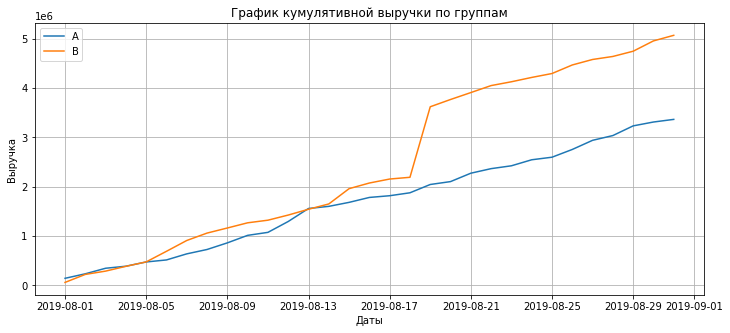

In [52]:
plt.figure(figsize=(12,5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.legend()
plt.grid();

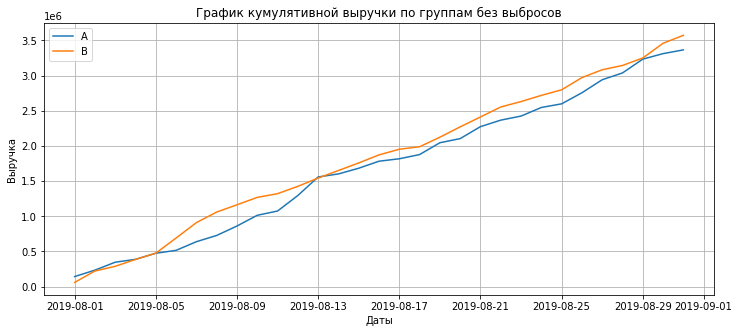

In [53]:
plt.figure(figsize=(12,5))
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'], label='A')
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'], label='B')
plt.title('График кумулятивной выручки по группам без выбросов')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.legend()
plt.grid();

In [54]:
orders.query(' "2019-08-17" < date < "2019-08-21" ').sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
751,348143148,689129267,2019-08-20,37150,B
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
630,1329556473,2626290177,2019-08-20,25890,B
294,3709669952,3295038680,2019-08-18,23750,A
368,3268879337,2536252163,2019-08-19,20026,B
749,2419950278,509080881,2019-08-20,19260,B


**Вывод:** за время проведения теста, мы наблюдаем повышение значений "В"-группы, особенно резкий скачок наблюдаем после 17 авг., после ручной проверки, мы увидели, что в группе "В" был сделан самый дорогой заказ на 1 294 500, возможно, заказ был выполнен юр.лицом. В целом, стоит отметить, увеличение выручки в тестируемой группе.

### График кумулятивного среднего чека по группам.

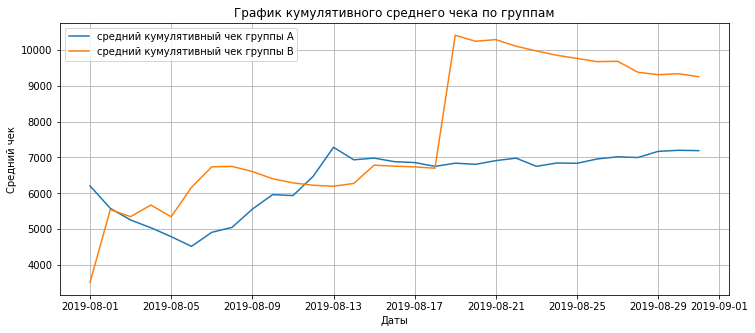

In [55]:
plt.figure(figsize=(12,5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'],
         label='средний кумулятивный чек группы A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'],
         label='средний кумулятивный чек группы B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.legend()
plt.grid();

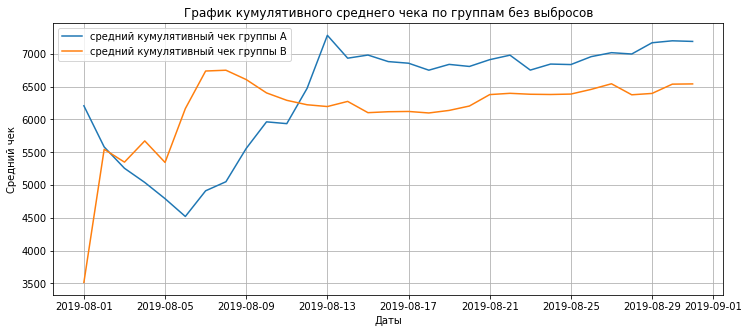

In [56]:
plt.figure(figsize=(12,5))
plt.plot(cum_rev_A['date'], cum_rev_A['revenue']/cum_rev_A['orders'],
         label='средний кумулятивный чек группы A')
plt.plot(cum_rev_B['date'], cum_rev_B['revenue']/cum_rev_B['orders'],
         label='средний кумулятивный чек группы B')
plt.title('График кумулятивного среднего чека по группам без выбросов')
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.legend()
plt.grid();

**Вывод:** накопление кумулятивного чека не так однозначно, наблюдается картина повышения, а так же спада тестируемой группы, в контрольной группе рост начинается с просадки значений, далее значения колеблются на уровне. Группа "В" на этом графике так же показывает резкий рост после 17 авг., как мы помним, выстреливает заказ с максимальной выручкой.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

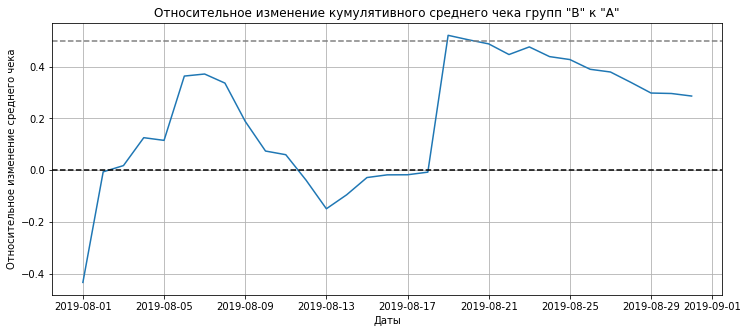

In [57]:
merged_сumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B,
                                                       left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,5))
plt.plot(merged_сumulative_revenue['date'], (merged_сumulative_revenue['revenueB']/merged_сumulative_revenue['ordersB'])/ \
         (merged_сumulative_revenue['revenueA']/merged_сumulative_revenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xlabel('Даты')
plt.ylabel('Относительное изменение среднего чека')
plt.grid(); 

**Вывод:** максимальное увеличение конверсии тестируемой группы доходит до 50%, но и так же имеется спад после роста в начале периода до 30 % спад до -10% к контрольной группе.

### График  кумулятивного среднего количества заказов на посетителя по группам.

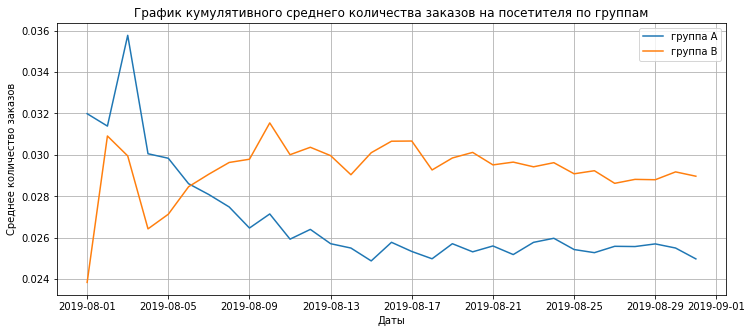

In [58]:
cumulative_data['avg'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(12,5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['avg'], label='группа A')
plt.plot(cumulative_data_B ['date'], cumulative_data_B ['avg'], label='группа B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()
plt.xlabel('Даты')
plt.ylabel('Среднее количество заказов')
plt.grid();

**Вывод:** в контрольной группе всплеск приходится на первые числа августа, далее провал показателей. Группа "В", начинает период с всплеска, далее спад, и далее резкий рост. В целом, тестируемая группа показывает лучший показатель конверсии.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

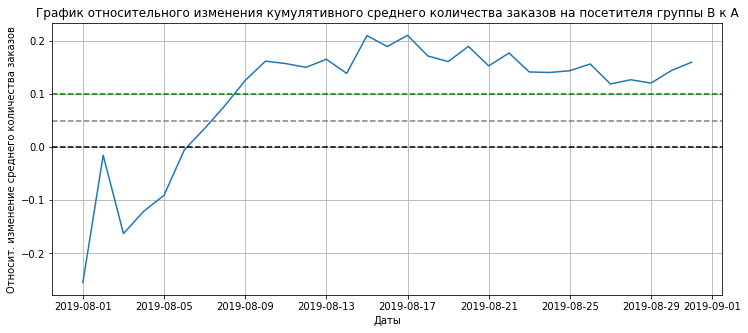

In [59]:
merged_cumulative_avg = (
    cumulative_data_A[['date','avg']].merge(cumulative_data_B[['date','avg']], 
                                        left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.figure(figsize=(12,5))
plt.plot(
    merged_cumulative_avg['date'],merged_cumulative_avg['avgB']/merged_cumulative_avg['avgA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A"
)
plt.title(
    'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к A'
)

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--') 
plt.xlabel('Даты')
plt.ylabel('Относит. изменение среднего количества заказов')
plt.grid();

**Вывод:** наблюдается схожая картина с графиком 3.4. Спад конверсии в начале периода, а далее рост показателя группы "В". Максимальный прирост достигается в середине августа(15-17), далее плавный спад.

### Точечный график количества заказов по пользователям.

In [ ]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']
print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

In [ ]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.grid();

**Вывод:** мы наблюдаем, что в основном, пользователи заказывают по одному заказу, реже 2, еще сильно резе 3 заказа на клиента. 4, 5 и более заказов крайне редки.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [ ]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

In [ ]:
print(np.percentile(orders_by_users['orders'], [97, 98]))

**Вывод:** заключение из пугкта 3.6 подтверждается. 95-перцентиль ограничивается 2 покупками, граница между 2 и 3 заказом 97-перцентиль. То есть, не более 3% пользователей с 3-мя и более заказами. В дальнейшем ограничим наши данные по заказам до 2-х покупок.

### Точечный график стоимостей заказов. 

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.xlabel('Стоимость заказов')
plt.ylabel('Заказы')
plt.grid();

In [ ]:
# n_revs = orders[orders['revenue']<=100000]['revenue']
# xn_values = pd.Series(range(0,len(n_revs)))
# plt.figure(figsize=(12,5))
# plt.grid()
# plt.title('График стоимостей заказов уточненный')
# plt.scatter(xn_values, n_revs, alpha=0.5);

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 100000)
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов');

**Вывод:** на первом графике мы видим, что основная стоимость заказов находится до 100 тыс у.е.. Наблюдается пару выбросов в районе 200 и более 1.2 млн у.е.. После вывода уточненного графика, можно с уверенностью сказать, что основная сумма заказов находится на отметке около 30 тыс у.е.. Все, что более уже можно рассматривать как аномалию.

### 95-й и 99-й перцентили стоимости заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99])) 

In [ ]:
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99])) 

**Вывод:** изучив перцентили по выручки, можно убедиться, что 95 % заказов достигают отметки 28 тыс у.е., и всего лишь 1% имеет сумму заказов более 58 тыс у.е. В дальнейшем ограничим данные 95% или же 28 тыс у.е..

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [ ]:
vis_per_date = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

In [ ]:
vis_per_date.query('"2019-08-01" < =  date < = "2019-08-03"') ##смотрю, как себя чувствует табл.

In [ ]:
daily = visitors[visitors['group']=='A'][['date', 'visitors']] 

In [ ]:
daily.columns = ['date', 'visitors_A'] 

In [ ]:
daily.query('"2019-08-01" < =  date < = "2019-08-03"') ##смотрю, как себя чувствует табл.

In [ ]:
daily_b = visitors[visitors['group']=='B'][['date', 'visitors']]

In [ ]:
daily_b.columns = ['date', 'visitors_B'] 

In [ ]:
daily_b.query('"2019-08-01" < =  date < = "2019-08-03"') #смотрю, как себя чувствует табл.

In [ ]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']

sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                daily['visitors_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                daily_b['visitors_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим гипотезу, есть ли статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

- **H0:** Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- **H1:** Cтатистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print('Относительный показатель = {0:.3f}'.format(sample_B.mean()/sample_A.mean()-1)) 

**Вывод:** р-value(0,011) меньше 0.05, нулевую гипотезу отвергаем. Анализ «сырых данных» показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проверим гипотезу, есть ли статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

- **H0:** Cтатистически значимых различий в среднем чеке заказа между группами нет.
- **H1:** Cтатистически значимые различия в среднем чеке заказа между группами есть.

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                    orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                  orders[orders['group']=='A']['revenue'].mean()-1))

**Вывод:** по «сырым» данным различий в среднем чеке заказов между группами нет. Р-value = 0.829 (> 0.05), значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. Однако относительный показатель группы "B" равен 28.7%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [ ]:
min_orders = 2
min_revenue = 27000

many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > min_orders]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > min_orders]['user_id'],
    ],
    axis=0,
)
high_expense = orders[orders['revenue'] > min_revenue]['visitor_id']
abnormal = (
    pd.concat([many_orders, high_expense], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal.head(5))
print(abnormal.shape[0])

Ограничим данные почти на 6 %. 58 пользователя сделали более 2-х заказов и потратили более 28000 у.е., ранее эти пороги нами были определены как аномалии.

In [ ]:
A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['user_id'].isin(abnormal))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                daily['visitors_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['user_id'].isin(abnormal))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                daily_b['visitors_B'].sum() - len( orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Проверим, есть ли статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- **H0:** Cтатистически значимых различий в среднем количестве заказов на посетителя после очистки данных между группами нет.
- **H1:** Cтатистически значимые различия в среднем количестве заказов на посетителя после очистки данных между группами есть.

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(A_filtered, B_filtered)[1]))
print('Относительный показатель = {0:.3f}'.format(B_filtered.mean()/A_filtered.mean()-1))

**Вывод:** по "очищенным" данным статистическая значимость достигнута, можем отвергнуть нулевую гипотезу, о том, что различий в среднем количестве заказов на посетителя между группами нет. Тестируемая группа показала прирост на 18.2%(по "сырым" данным 16%)

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим, есть ли статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

- **H0:** Cтатистически значимых различий в средних чеках после очистки данных между группами нет.
- **H1:** Cтатистически значимые различия в средних чеках после очистки данных между группами есть.

In [ ]:
print('alpha =',0.05)

print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный показатель = {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal)),
            )
        ]['revenue'].mean()
        - 1
    )
)

**Вывод:**  по «очищенным» данным различий в среднем чеке заказов между группами нет. Р-value = 0.646 (> 0.05), значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не можем отвергнуть. Однако относительный показатель группы "B" равен уже не 28.7%, а -0,05%. Высокая доля вероятности, что именно заказ в более, чем 1.2 млн у.е дал такой шум.

### Решение по результатам теста.

**Вывод:**  
- есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий(до 16%, после 18,2%);
- по сырым и фильтрованным данным нет статистически значимого различия по среднему чеку между группами, однако относительные показатели колебались(до 28.7%, после -0,05%);
- по графику различия конверсии между группами видно, что результаты группы B лучше группы A: имеют тенденцию к росту.

Решение по результатам теста: остановить и признать его успешным.

## Общий вывод

В данном проекте была проделана большая работа по приоритизации гипотез, и дальнейшего тестирования наиболее приоритетной из них.
Напомню, что контрольная группа оставалась без изменений, в тестируемой группе  реализовывалась гипотеза №7 "Добавка формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
В тестируемой группе, несмотря на то, что средний чек почти не отличался от контрольной группы, однако конверсия увеличилась почти на  16% по данным без фильтрации, что характеризует группу "В" как более эффективную. 
Несмотря на то, что после очистки данных превышение группы "В" по выручке на графике немного превышает контрольную группу, однако в общем, дает результат на 16%(18.2% после исключения аномалий). 
По среднему чеку, группа "А" незначительно опережает тестируемую.
Целью нашего проекта было увеличение показателя выручки, по результатам А/В теста, цель была достигнута путем увеличения среднего значения заказов на посетителя.

Рекомендую тест прекратить и внедрить для всех пользователей формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок для увеличения основного KPI - выручки.